- We will use a method called a linear congruential generator, which was popular in the old days of pseudo-random generation.

- The output of our program will take the form of a simple Uniform Distribution).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import time
def pseudo_uniform_good(mult=16807,
                        mod=(2**31)-1,
                        seed=123456789,
                        size=1):
    U = np.zeros(size)
    x = (seed*mult+1)%mod
    U[0] = x/mod
    for i in range(1,size):
        x = (x*mult+1)%mod
        U[i] = x/mod
    return U

 if we generate 10,000 random numbers and plot their histogram, it looks like following.

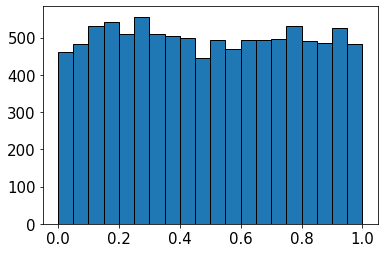

In [2]:
l=pseudo_uniform_good(size=10000)
plt.hist(l,bins=20,edgecolor='k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [3]:
pseudo_uniform_good(40) 

array([0.29956189])

In [4]:
def generate_random(low=0,high=1, seed=123456789, size=1):
#Generates uniformly random number between 'low' and 'high' limits
    return low+(high-low) *pseudo_uniform_good(seed=seed, size=size)

In [5]:
generate_random(10000)

array([7816.0354437])

Estimationg the value of pi using the generated number.


formula : pie * 4 = no of points inside the circle / no of points inside the square.

1. Initialize circle_points, square_points 
2. Generate random point x. 
3. Generate random point y. 
4. Calculate d = x*x + y*y. 
5. If distance is  <= 1, increment circle_points. 
6. Increment square_points. 
7. Calculate pi = 4*(circle_points/square_points). 

In [12]:
def pi_estimator(samples):
    points_inside_circle= 0
    square_points = 0
    X,Y = pseudo_uniform_good(size=2*samples).reshape(2,-1)

    for x,y in zip(X,Y):
        distance = x**2 + y**2     # Distance between (x, y) from the origin

        if distance <= 1:
            points_inside_circle +=1
        square_points += 1
        
        # Estimating value of pi,
    # pi= 4*(no. of points generated inside the 
    # circle)/ (no. of points generated inside the square)
    return 4* points_inside_circle/square_points

In [13]:
pi_estimator(5**7)

3.1407616